# HW 2
Ajay Mishra,Shipon Nath,Michel Ngoye, Ilona Inchenko,Arina 

# Import libraries and read files

In [2]:
import pandas as pd
import json
import requests
import urllib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1)Read file "twins_base"
targetUrl = "https://disk.yandex.ru/d/Sgi_dNgZZjKtFA" 
url = "https://cloud-api.yandex.net/v1/disk/public/resources?public_key=" + urllib.parse.quote(targetUrl, safe="") 
responseData = requests.get(url) 
url = responseData.json()['file'] + '/' + responseData.json()['name'] 
twins_base = pd.read_csv(url)

In [4]:
# 2)Read file "visa_transactions_non_particip", set type for 'transaction_dt' as date
targetUrl = "https://disk.yandex.ru/d/zRxnwszzuyaq_w" 
url = "https://cloud-api.yandex.net/v1/disk/public/resources?public_key=" + urllib.parse.quote(targetUrl, safe="") 
responseData = requests.get(url) 
url = responseData.json()['file'] + '/' + responseData.json()['name'] 
visa_transactions_non_particip = pd.read_csv(url, parse_dates=['transaction_dt'])


In [5]:
# 3)Read file "visa_transactions", set type for 'transaction_dt' as date
targetUrl = "https://disk.yandex.ru/d/U3FAIu5hF6rSFQ" 
url = "https://cloud-api.yandex.net/v1/disk/public/resources?public_key=" + urllib.parse.quote(targetUrl, safe="") 
responseData = requests.get(url) 
url = responseData.json()['file'] + '/' + responseData.json()['name'] 
visa_transactions = pd.read_csv(url, parse_dates=['transaction_dt'])

In [6]:
# 4)Read file "visa_communications", set type for 'contact_dt' as date
targetUrl = "https://disk.yandex.ru/d/cJCp7I-VXrGOyA" 
url = "https://cloud-api.yandex.net/v1/disk/public/resources?public_key=" + urllib.parse.quote(targetUrl, safe="") 
responseData = requests.get(url) 
url = responseData.json()['file'] + '/' + responseData.json()['name']  
visa_communications = pd.read_csv(url, parse_dates=['contact_dt'])

In [7]:
# 5)Read file "card_openings", set type for 'contact_dt' and 'open_dt' as date
targetUrl = "https://disk.yandex.ru/d/N7XkKp5RZa8yQw" 
url = "https://cloud-api.yandex.net/v1/disk/public/resources?public_key=" + urllib.parse.quote(targetUrl, safe="") 
responseData = requests.get(url) 
url = responseData.json()['file'] + '/' + responseData.json()['name'] 
card_openings = pd.read_csv(url, parse_dates=['open_dt', 'contact_dt'])

In [8]:
# 6)Read file "card_openings_non_participants", set type for 'contact_dt' and 'open_dt' as date
targetUrl = "https://disk.yandex.ru/d/NhktlkH_1tHVzA" 
url = "https://cloud-api.yandex.net/v1/disk/public/resources?public_key=" + urllib.parse.quote(targetUrl, safe="") 
responseData = requests.get(url) 
url = responseData.json()['file'] + '/' + responseData.json()['name'] 
card_openings_non_participants = pd.read_csv(url, parse_dates=['open_dt', 'contact_dt'])

In [13]:
# 7)Read file "features"
targetUrl = "https://disk.yandex.ru/d/3q1U8TLFxz5S9g" 
url = "https://cloud-api.yandex.net/v1/disk/public/resources?public_key=" + urllib.parse.quote(targetUrl, safe="") 
responseData = requests.get(url) 
url = responseData.json()['file'] + '/' + responseData.json()['name'] 
features_try2=pd.read_csv(url, compression='zip')

# Data preprocessing

### Description

In [14]:
twins_base.head(2)

,tg_cust_id,synthetic_control_group_cust_id
0,0002389bfab4bb945654b5b3ac7441e2c634e6062fc780...,1b5e8227cdc3e41b8159684a4ca09c6107cebc2b92630e...
1,0003e193ac559ca40490de7e059116752e4e621366ba2c...,b3433e2f2b7eb77ffb9806e7ad9ebbeb2d119d2bdf1682...


In [15]:
twins_base.isnull().sum()

tg_cust_id                         0
synthetic_control_group_cust_id    0
dtype: int64

In [16]:
visa_transactions_non_particip.head(2)

,cust_id,transaction_dt,mcc_id,txn_sum
0,7ab840dd10c9eec7ba477160c74eaff315746f5db370c9...,2021-08-28,5499,645.00
1,b920f5f439d996cb87ff138610bd123bcd03dae7bc4602...,2021-09-15,5921,304.56


In [17]:
visa_transactions_non_particip.isnull().sum()

cust_id           0
transaction_dt    0
mcc_id            0
txn_sum           0
dtype: int64

In [18]:
visa_transactions.head(2)

,cust_id,transaction_dt,mcc_id,txn_sum
0,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-09-09,5399,2322.0
1,9fc01d326a0adcb9caaabe298064b8a26aa711878cf89f...,2021-09-07,5533,1245.0


In [19]:
visa_transactions.isnull().sum()

cust_id           0
transaction_dt    0
mcc_id            0
txn_sum           0
dtype: int64

In [20]:
visa_transactions.dtypes

cust_id                   object
transaction_dt    datetime64[ns]
mcc_id                     int64
txn_sum                  float64
dtype: object

In [21]:
visa_communications.head(2)

,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked,cust_id
0,Popup,2021-08-23,0,1,1,1,0,0,5d0a0cae173c27947838b9f3ad1282fa30771272747ede...
1,EMAIL,2021-08-12,0,1,1,0,0,0,b70d7c45f4d1724acdba89bead5941f13d93406bcbb1d7...


In [22]:
card_openings.head(2)

,cust_id,open_dt,contact_dt
0,2537ec14c2e5b8607ea67dfe09ec687205c59ed152407f...,2021-08-19,2021-08-12
1,b6bc9799397f07c8304673d4d51e7788a143ecb710452e...,2021-08-16,2021-08-13


In [23]:
card_openings.dtypes

cust_id               object
open_dt       datetime64[ns]
contact_dt    datetime64[ns]
dtype: object

In [24]:
card_openings_non_participants.head(2)

,cust_id,open_dt,contact_dt
0,00142a5cfe4dd6ac883e4dc0ba888d6266ce99257e0825...,2021-08-26,0
1,00b037b74b45a2a0c9dc64b59a2587dd79dabc93e1d84b...,2021-08-12,0


In [25]:
features_try2

,cust_id,mnth_gen,turnover,involve_cd,client_segment,gender,age_gr
0,ad767176b86d500e5b8421315731388ff6c5ec93079ec9...,2021-06-01,17764.83,1,MASS,F,25-40
1,cc7c069e1866b0e14e6a733ecddaa9e503ebe5b422b796...,2021-06-01,18817.45,1,MASS,M,25-40
2,914c9e80623d8fdecb0fa39662089aa78c7c076182728f...,2021-01-01,19198.74,1,MVS LIGHT,F,25-40
3,e45e78863f239d3933462c1a06a9f23727033232851fb5...,2021-04-01,114637.54,1,MVS UPPER,F,40-60
4,2201a68b8c83f098aee50a5b787bb8344a90b2b9a64b83...,2021-07-01,112603.01,0,MVS LIGHT,F,25-40
...,...,...,...,...,...,...,...
31418095,34428933144b435f18e5176bc03b14f9dc56c831019a8f...,2021-03-01,12145.00,0,MASS,M,25-40
31418096,cc8478a8375cf0e3a612e25eb7d2aab47ed8bbc48a5595...,2021-02-01,19949.06,1,MASS,F,25-40
31418097,8d7c931de1e2e81efe750252869d09733276214ce08d0f...,2021-03-01,21599.09,1,MASS,F,25-40
31418098,a3d77caee91c8317df7d1fc8eaf4fad78c205a96ad248c...,2021-06-01,17685.83,1,MVS LIGHT,F,25-40


In [26]:
features_try2.dtypes

cust_id            object
mnth_gen           object
turnover          float64
involve_cd          int64
client_segment     object
gender             object
age_gr             object
dtype: object

In [27]:
features_try2['mnth_gen'] = pd.to_datetime(features_try2['mnth_gen'], errors='coerce')

In [28]:
features_try2.dtypes

cust_id                   object
mnth_gen          datetime64[ns]
turnover                 float64
involve_cd                 int64
client_segment            object
gender                    object
age_gr                    object
dtype: object

# Key indicators for the campaign and funnel 


The key indicators chosen for measuring the effectiveness of the email campaign are the following:


*   the open rate
*   click rate


*   click to open rate
*   conversion rate










##We will first calculate the open rate of the campaign

We will calculate first the open rate by dividing the number of customers who opened the email to the number of customers who got the email.
Since we have in our data a difference between sent and delivered, we are going to calculate:


*   nbr of customers who opened the email / sent 
*   nbr of customers who opened the email / sent and delivered



Number of customers who opened the email:

In [29]:
count_opened = len(visa_communications[(visa_communications['opened']== 1) & (visa_communications['control_group_flg']== 0)])

print(count_opened)

317045


Number of customers to whom emails were sent:

In [30]:
count_sent = len(visa_communications[(visa_communications['sent']== 1) & (visa_communications['control_group_flg']== 0)])

In [31]:
print(count_sent)

821051


Number of customers to whom the emails were sent and who received it:

In [32]:
count_sent_delivered = len(visa_communications[(visa_communications['sent']==1) & (visa_communications['delivered']==1) & (visa_communications['control_group_flg']== 0)])

print(count_sent_delivered)

788582


The open rate for customers to whom the email was sent is:

In [33]:
open_rate1 = count_opened / count_sent 

print(open_rate1)

0.3861453186221075


The open rate for customers to whom the email was sent and who received it is:

In [34]:
open_rate2 = count_opened / count_sent_delivered

print(open_rate2)

0.40204442911453725


##We will then calculate the click rate of the email campaign


The number of customers who clicked the action button in the email:

In [35]:
count_clicked = len(visa_communications[(visa_communications['clicked']== 1) & (visa_communications['control_group_flg']== 0)])

print(count_clicked)

24398


We will calculate the click rate for customers to whom the email was sent and customers to whom to email was sent and who received the email

In [36]:
click_rate1 = count_clicked / count_sent 

print(click_rate1)

0.029715571870687692


In [37]:
click_rate2 = count_clicked / count_sent_delivered 

print(click_rate2)

0.03093907799062114


##We will now calculate the click to open rate

the click to open rate is:

In [38]:
click_to_open_rate = count_clicked / count_opened 

print(click_to_open_rate)

0.07695437556182876


##We will finally calculate the conversion rate

The key action being opening an account, we will calculate first the number of customers who opened an account

In [39]:
count_new_customers = len(card_openings.index)

print(count_new_customers)

22995


The conversion rate will then be:

In [40]:
conversion_rate1 = count_new_customers / count_sent 

print(conversion_rate1)

0.028006786423742252


In [41]:
conversion_rate2 = count_new_customers / count_sent_delivered

print(conversion_rate2)

0.029159935174782076




```
# This is formatted as code
```

**synthetic_control_group**


In [42]:
SCG = twins_base.rename(columns = {'synthetic_control_group_cust_id':
                              'cust_id'})

Rename Coulm to cust_id to join with other tables cust_id


In [43]:
SCG.head(10)

,tg_cust_id,cust_id
0,0002389bfab4bb945654b5b3ac7441e2c634e6062fc780...,1b5e8227cdc3e41b8159684a4ca09c6107cebc2b92630e...
1,0003e193ac559ca40490de7e059116752e4e621366ba2c...,b3433e2f2b7eb77ffb9806e7ad9ebbeb2d119d2bdf1682...
2,000bcd2b9a9baba21d919252a67b4a72d73ee6b666aac3...,9e5ed7736baad40b61b4c86534ddf6d608da8f718c8b6b...
3,000f349449114fbb293ba4cb4f8efb48adaebd7aade67b...,125eeca73effdac0d44004de3ee7720556d2fe3a30f58f...
4,0011c3bb53e4f73534edf3e922abae44ccc1333ba9a7b3...,bb08bea34c22a12e8c8209b84717fb8906b2c978316933...
5,0012ccd36d40318d069262fe24f1a688c3fcc5124553b3...,1da6cbae1ad2026c487fa1eb2a89def99efa08399b566a...
6,0016c22079f535fd1ff3c555f8be94186d2760033fbfc1...,6b8a5e8708d27176f86e33afc756b32ca58714b8177587...
7,00181c0d9d5922c7bbd976386784a36a089fd22048f8a2...,d0a3415065445544e96da3a412627679eb7ae2524891c1...
8,001dd18a2701c5b0683431e143534c77fff5bb424ee242...,757f118bea0c71ab0eb1e56a38369980ae8752275b6f68...
9,001f0f21433f276b33b566ff9f6cef0f6b16d21c23d559...,16ed2dfb07e64b98c392617c0cf8e6c28bbf1f7f3c05e8...


droped the targeted customers colum

In [44]:
SCG1= SCG.drop("tg_cust_id",axis=1)

In [45]:
SCG1.head(5)

,cust_id
0,1b5e8227cdc3e41b8159684a4ca09c6107cebc2b92630e...
1,b3433e2f2b7eb77ffb9806e7ad9ebbeb2d119d2bdf1682...
2,9e5ed7736baad40b61b4c86534ddf6d608da8f718c8b6b...
3,125eeca73effdac0d44004de3ee7720556d2fe3a30f58f...
4,bb08bea34c22a12e8c8209b84717fb8906b2c978316933...


Joined with visa_communications  

In [46]:
sGroup = SCG1.merge(visa_communications, how='left')

In [47]:
sGroup.head()

,cust_id,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked
0,1b5e8227cdc3e41b8159684a4ca09c6107cebc2b92630e...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,b3433e2f2b7eb77ffb9806e7ad9ebbeb2d119d2bdf1682...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,9e5ed7736baad40b61b4c86534ddf6d608da8f718c8b6b...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,125eeca73effdac0d44004de3ee7720556d2fe3a30f58f...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,bb08bea34c22a12e8c8209b84717fb8906b2c978316933...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


droped all NaN values 

In [48]:
sGroup1=sGroup.dropna()

In [49]:
sGroup1.head()

,cust_id,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked
462,d8a2405b3edca67c724aaeeb9d2f0b412372f33239a61e...,PUSH,2021-08-12,1.0,0.0,0.0,0.0,0.0,0.0
555,8b8ab846881cd13021805769555c47671ed0cb5be42af8...,PUSH,2021-08-12,1.0,0.0,0.0,0.0,0.0,0.0
758,d6e580b20741d77c3ea0217c5d48b01acf21909646ccab...,PUSH,2021-08-12,1.0,0.0,0.0,0.0,0.0,0.0
811,4d2d2aba43428c87498897b420f4ccf9dcc9b3616847ed...,PUSH,2021-08-12,1.0,0.0,0.0,0.0,0.0,0.0
922,20f03fa1f250cea48b27d753c8903797847cc840735f3f...,EMAIL,2021-08-12,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
sGroup1.count()

cust_id              6300
channel_type         6300
contact_dt           6300
control_group_flg    6300
sent                 6300
delivered            6300
opened               6300
clicked              6300
blocked              6300
dtype: int64

In [51]:
sGroup2= sGroup1.merge(visa_transactions_non_particip, how='left')

In [52]:
sGroup3=sGroup2.dropna()

In [53]:
sGroup3.head()

,cust_id,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked,transaction_dt,mcc_id,txn_sum
19,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-05,5499.0,200.00
20,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-05,5411.0,368.94
21,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-08-29,5411.0,688.70
22,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-05,5131.0,3933.00
23,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-08-20,5441.0,25.00


In [54]:
sGroup3.count()

cust_id              4327
channel_type         4327
contact_dt           4327
control_group_flg    4327
sent                 4327
delivered            4327
opened               4327
clicked              4327
blocked              4327
transaction_dt       4327
mcc_id               4327
txn_sum              4327
dtype: int64

In [55]:
sGroup4= sGroup3.merge(card_openings_non_participants, on=["cust_id"],how='left')

In [56]:
sytheticControlGroupData = sGroup4.dropna()

## Generated Synthetic Group data after merging twins_base , card_openings_non_participants ,visa_transactions_non_particip ,and visa_communications tables on cust_id  

In [57]:
sytheticControlGroupData.head(10)

,cust_id,channel_type,contact_dt_x,control_group_flg,sent,delivered,opened,clicked,blocked,transaction_dt,mcc_id,txn_sum,open_dt,contact_dt_y
0,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-05,5499.0,200.00,2021-08-12,0
1,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-05,5411.0,368.94,2021-08-12,0
2,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-08-29,5411.0,688.70,2021-08-12,0
3,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-05,5131.0,3933.00,2021-08-12,0
4,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-08-20,5441.0,25.00,2021-08-12,0
5,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-08-20,5411.0,1411.79,2021-08-12,0
6,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-08-19,5441.0,165.00,2021-08-12,0
7,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-03,5411.0,771.32,2021-08-12,0
8,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-08-15,5541.0,1699.61,2021-08-12,0
9,66e8c2121bff02c77920eebb2173f4ec96dfa68bd00a91...,EMAIL,2021-08-13,1.0,0.0,0.0,0.0,0.0,0.0,2021-09-02,5541.0,1800.00,2021-08-12,0


In [58]:
sytheticControlGroupData.count()

cust_id              4859
channel_type         4859
contact_dt_x         4859
control_group_flg    4859
sent                 4859
delivered            4859
opened               4859
clicked              4859
blocked              4859
transaction_dt       4859
mcc_id               4859
txn_sum              4859
open_dt              4859
contact_dt_y         4859
dtype: int64

**Now We will have targeted group data to compare with sythatic group data **

In [59]:
TG = twins_base.rename(columns = {'tg_cust_id':
                              'cust_id'})

In [60]:
TG1= TG.merge(visa_transactions_non_particip, how='left')

#### We will calcute the effect of the eamil

Merged the visa communications with features type 2 by cust_id and tried to find the effect of email.

In [75]:
Popup_num = visa_communications[(visa_communications['channel_type'] == 'Popup') & (visa_communications['clicked'] == 1)]
print(Popup_num)

        channel_type contact_dt  control_group_flg  sent  delivered  opened  \
189            Popup 2021-08-12                  0     1          1       1   
283            Popup 2021-08-19                  0     1          1       1   
311            Popup 2021-08-25                  0     1          1       1   
364            Popup 2021-08-17                  0     1          1       1   
427            Popup 2021-08-12                  0     1          1       1   
...              ...        ...                ...   ...        ...     ...   
1456089        Popup 2021-08-16                  0     1          1       1   
1456336        Popup 2021-08-23                  0     1          1       1   
1456583        Popup 2021-08-17                  0     1          1       1   
1456601        Popup 2021-08-11                  0     1          1       1   
1456771        Popup 2021-08-11                  0     1          1       1   

         clicked  blocked                          

In [61]:
email_num = visa_communications[(visa_communications['channel_type'] == 'EMAIL') & (visa_communications['clicked'] == 1)]
print(email_num)

        channel_type contact_dt  control_group_flg  sent  delivered  opened  \
51             EMAIL 2021-08-12                  0     1          1       1   
981            EMAIL 2021-08-13                  0     1          1       1   
1248           EMAIL 2021-08-13                  0     1          1       1   
1347           EMAIL 2021-08-12                  0     1          1       1   
1561           EMAIL 2021-08-13                  0     1          1       1   
...              ...        ...                ...   ...        ...     ...   
1452537        EMAIL 2021-08-12                  0     1          1       1   
1453297        EMAIL 2021-08-13                  0     1          1       1   
1453325        EMAIL 2021-08-12                  0     1          1       1   
1455016        EMAIL 2021-08-12                  0     1          1       1   
1455988        EMAIL 2021-08-12                  0     1          1       1   

         clicked  blocked                          

In [78]:
match_Popup_cust_id = features_try2[features_try2['cust_id'].isin(Popup_num['cust_id'])]
print(match_Popup_cust_id)

                                                    cust_id   mnth_gen  \
13691     68a29416504de93e5f7e0e368adc6e079df0a09a9e47ec... 2021-08-01   
36405     de551def70b3849094ea6ad314edee50f0c24f44d1cbbd... 2021-01-01   
40636     70dcb3721a2c21d29e7a67e718146207c9d1d3fc1bb973... 2021-01-01   
42372     ccd4c00340e73a8f8e42b461ea07e5e4d9aea17b7fff84... 2021-02-01   
65417     6422b7224769bfe6ddbe3041fb3f4282b89902fa4e8ea7... 2021-05-01   
...                                                     ...        ...   
31349615  863767f12fcf798fe2c7bb3471401a94b9242f72f82b15... 2021-01-01   
31358267  e13d12b423d446214e4dae115c6588e8260674e744e6ea... 2021-02-01   
31379478  50aa30f9419d26e230bb9a2edf7d5b521429f526428441... 2021-09-01   
31386614  82a5c61ab9311ea23d95189bf19c10d053a554b58e39d7... 2021-02-01   
31404282  dbd8c7c67aa14f9c3f11df294f7bcafac750673962c472... 2021-07-01   

          turnover  involve_cd client_segment gender age_gr  
13691     15766.99           0           MASS    

In [62]:
match_cust_id = features_try2[features_try2['cust_id'].isin(email_num['cust_id'])]
print(match_cust_id)

                                                    cust_id   mnth_gen  \
36        ae1b4c4d49ba98022a1da7f264e41ef47302713d3169c0... 2021-01-01   
599       a86920c2400b0ab7776c81e481387f439ede1f8319a7aa... 2021-04-01   
1086      1366d81da4edb2679ac4bc77ed767b713853119d04476f... 2021-07-01   
1174      f0a1bb12db7b2ed1a4f5d00fa64a1acf4bfbddc20fa2a8... 2021-09-01   
1478      e2c6b8711f2d12a59b04fb41fba797b7c8dda8171c4518... 2021-07-01   
...                                                     ...        ...   
31416795  302f04c832f54fec653dc3f2cc8f73afec1763616bbb1a... 2021-08-01   
31416825  54f7a919e957443579923599b2459c212bbcf5648da797... 2021-10-01   
31417476  85c97dc55fbb922f73d19a522042f855715fbd81526411... 2021-10-01   
31417727  a7c36cfe6a7fc846c46b530f70c04121be2939eabe6d8a... 2021-06-01   
31417936  93040451246bd1e8c202d873d08e9cff358c58548e0fbd... 2021-09-01   

          turnover  involve_cd client_segment gender age_gr  
36        13632.97           1           MASS    

In [80]:
done_work_popup = match_Popup_cust_id[['cust_id', 'turnover', 'mnth_gen', 'gender']]
print(done_work_popup)

                                                    cust_id  turnover  \
13691     68a29416504de93e5f7e0e368adc6e079df0a09a9e47ec...  15766.99   
36405     de551def70b3849094ea6ad314edee50f0c24f44d1cbbd...  34018.47   
40636     70dcb3721a2c21d29e7a67e718146207c9d1d3fc1bb973...  22863.11   
42372     ccd4c00340e73a8f8e42b461ea07e5e4d9aea17b7fff84...  18223.50   
65417     6422b7224769bfe6ddbe3041fb3f4282b89902fa4e8ea7...   5058.39   
...                                                     ...       ...   
31349615  863767f12fcf798fe2c7bb3471401a94b9242f72f82b15...    476.97   
31358267  e13d12b423d446214e4dae115c6588e8260674e744e6ea...  54494.03   
31379478  50aa30f9419d26e230bb9a2edf7d5b521429f526428441...  18270.43   
31386614  82a5c61ab9311ea23d95189bf19c10d053a554b58e39d7...   5667.13   
31404282  dbd8c7c67aa14f9c3f11df294f7bcafac750673962c472...  12647.61   

           mnth_gen gender  
13691    2021-08-01      F  
36405    2021-01-01      F  
40636    2021-01-01      M  
42372  

In [63]:
done_work = match_cust_id[['cust_id', 'turnover', 'mnth_gen', 'gender']]
print(done_work)

                                                    cust_id  turnover  \
36        ae1b4c4d49ba98022a1da7f264e41ef47302713d3169c0...  13632.97   
599       a86920c2400b0ab7776c81e481387f439ede1f8319a7aa...  11263.59   
1086      1366d81da4edb2679ac4bc77ed767b713853119d04476f...  48467.94   
1174      f0a1bb12db7b2ed1a4f5d00fa64a1acf4bfbddc20fa2a8...  39192.76   
1478      e2c6b8711f2d12a59b04fb41fba797b7c8dda8171c4518...  25658.37   
...                                                     ...       ...   
31416795  302f04c832f54fec653dc3f2cc8f73afec1763616bbb1a...  52828.64   
31416825  54f7a919e957443579923599b2459c212bbcf5648da797...  57073.39   
31417476  85c97dc55fbb922f73d19a522042f855715fbd81526411...  74756.81   
31417727  a7c36cfe6a7fc846c46b530f70c04121be2939eabe6d8a...  25264.92   
31417936  93040451246bd1e8c202d873d08e9cff358c58548e0fbd...  46216.97   

           mnth_gen gender  
36       2021-01-01      M  
599      2021-04-01      M  
1086     2021-07-01      M  
1174   

In [81]:
done_work_Popup_grouped=done_work_popup.groupby('mnth_gen', as_index=False).agg({'turnover':'sum'})

In [82]:
done_work_Popup_grouped.head(3)

,mnth_gen,turnover
0,2021-01-01,3502665.10
1,2021-02-01,4417466.97
2,2021-03-01,3598873.19


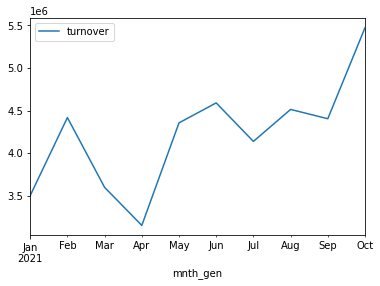

In [83]:
done_work_Popup_grouped.plot(x='mnth_gen', y ='turnover', kind='line')
plt.show()

In [69]:
done_work_grouped=done_work.groupby('mnth_gen', as_index=False).agg({'turnover':'sum'})

In [72]:
done_work_grouped.head(3)

,mnth_gen,turnover
0,2021-01-01,1.891700e+08
1,2021-02-01,2.192365e+08
2,2021-03-01,1.857200e+08


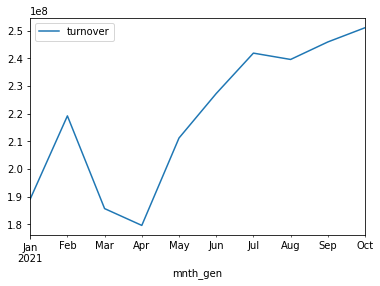

In [73]:
done_work_grouped.plot(x='mnth_gen', y ='turnover', kind='line')
plt.show()